# Comparing Several Different Measurement Metrics for Model Accuracy

R-squared, Mean Absolute Error (MAE) and Root mean squared error (RMSE) are three of the most common metrics used to measure accuracy for continuous variables. 
 
 In this post we will compare R^2, MAE and MSE effect on accuracy calculation

We will prepare dat to compare these metrics 

In [338]:
# if the command "import torch" causes an error, use the following to install PyTorch
#!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp27-cp27mu-linux_x86_64.whl 
#!pip install torchvision
import torch

In [354]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

#import torch.utils.data

In [355]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from collections import defaultdict
from itertools import count

from pandas import Series
from sklearn import metrics

from sklearn.linear_model import lars_path, lasso_path, enet_path, LassoCV, LassoLarsCV, LassoLarsIC

from datetime import datetime
from time import time

%matplotlib inline

In [356]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 1. keep MSE Constan while $R^2$ an Accuracy are increasing.

# Data1 (D1): $Y=0.1+0.1*X_1+0.1*X_2+0.1*X_3+(noise=0.1)$

In [363]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([0.1, 0.1, 0.1], dtype=np.float32)
const_bias = 0.1

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
##############################
for i in range(1,300):
    y=i+1
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
    if y==300:
        Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D1_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D1_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D1_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D1_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
Accuracy=(Accuracy)

(700, 3)
(300, 3)
(700, 1)
(300, 1)


# Data2 (D2): $Y=0.5+0.5*X_1+0.5*X_2+0.5*X_3+(noise=0.1)$

In [364]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([0.5, 0.5, 0.5], dtype=np.float32)
const_bias = 0.5

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
##############################
for i in range(1,300):
    y=i+1
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
    if y==300:
        Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D2_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D2_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D2_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D2_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
Accuracy=(Accuracy)

(700, 3)
(300, 3)
(700, 1)
(300, 1)


# Data3 (D3): $Y=1+1*X_1+1*X_2+1*X_3+(noise=0.1)$

In [365]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([1, 1, 1], dtype=np.float32)
const_bias = 0.1

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
##############################
for i in range(1,300):
    y=i+1
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
    if y==300:
        Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D3_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D3_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D3_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D3_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D3_Accuracy=(Accuracy)

(700, 3)
(300, 3)
(700, 1)
(300, 1)


# Data4 (D4): $Y=10+10*X_1+10*X_2+10*X_3+(noise=0.1)$

In [366]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([10, 10, 10], dtype=np.float32)
const_bias = 0.1

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
##############################
for i in range(1,300):
    y=i+1
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
    if y==300:
        Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D4_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D4_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D4_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D4_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D4_Accuracy=(Accuracy)

(700, 3)
(300, 3)
(700, 1)
(300, 1)


Now we will compare all the results

In [367]:
data = [['MSE',D1_MSE, D2_MSE, D3_MSE, D4_MSE],['MAE',D1_MAE, D2_MAE, D3_MAE, D4_MAE],
        ['R2',D1_R2, D2_R2, D3_R2, D4_R2], ['ACR', D1_Accuracy, D2_Accuracy, D3_Accuracy, D4_Accuracy]]
df = pd.DataFrame(data,columns=['Metric','D1', 'D2', 'D3', 'D4'])
print (np.round(df,3))

  Metric     D1     D2     D3     D4
0    MSE  0.011  0.011  0.011  0.011
1    MAE  0.085  0.085  0.085  0.085
2     R2  0.157  0.852  0.959  1.000
3    ACR  0.706  0.705  0.943  0.994


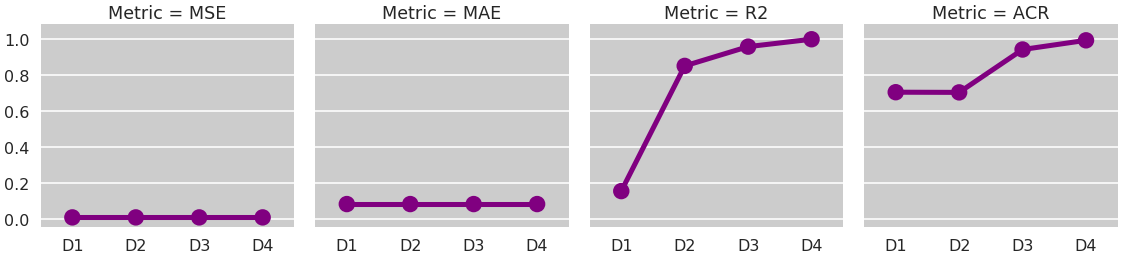

In [368]:
with sns.axes_style("darkgrid", {"axes.facecolor": "0.8"}):
    sns.set_context("poster")
    sns.factorplot(data=np.round(df, 3), kind="point", col="Metric", color='purple')
    

D1 to D4, the error is constant and coeficient values increasing by following steps; 0.1, 0.5, 1, 10. It can be seen from figure while MSE, and MAE are constant R-squared and Accuracy are increasing. 

# 2. keep $R^2$ and Accuracy Constan while MSE are increasing.

# Data1 (D1): $Y=0.1+0.1*X_1+0.1*X_2+0.1*X_3+(noise=0.1)$

In [369]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([0.1, 0.1, 0.1], dtype=np.float32)
const_bias = 0.1

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
##############################
for i in range(1,300):
    y=i+1
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
    if y==300:
        Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D1_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D1_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D1_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D1_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D1_Accuracy=(Accuracy)

(700, 3)
(300, 3)
(700, 1)
(300, 1)


# Data2 (D2): $Y=1+1*X_1+1*X_2+1*X_3+(noise=1)$

In [370]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([1, 1, 1], dtype=np.float32)
const_bias = 1

noise = 1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
##############################
for i in range(1,300):
    y=i+1
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
    if y==300:
        Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D2_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D2_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D2_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D2_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D2_Accuracy=(Accuracy)

(700, 3)
(300, 3)
(700, 1)
(300, 1)


# Data3 (D3): $Y=10+10*X_1+10*X_2+10*X_3+(noise=10)$

In [371]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([10, 10, 10], dtype=np.float32)
const_bias = 10

noise = 10*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
##############################
for i in range(1,300):
    y=i+1
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
    if y==300:
        Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D3_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D3_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D3_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D3_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D3_Accuracy=(Accuracy)

(700, 3)
(300, 3)
(700, 1)
(300, 1)


# Data4 (D4): $Y=100+100*X_1+100*X_2+100*X_3+(noise=100)$

In [372]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([100, 100, 100], dtype=np.float32)
const_bias = 100

noise = 100*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
##############################
for i in range(1,300):
    y=i+1
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
    if y==300:
        Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D4_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D4_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D4_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D4_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D4_Accuracy=(Accuracy)

(700, 3)
(300, 3)
(700, 1)
(300, 1)


  Metric     D1     D2       D3         D4
0    MSE  0.011  1.062  106.240  10623.969
1    MAE  0.085  0.854    8.538     85.377
2     R2  0.157  0.157    0.157      0.157
3    ACR  0.705  0.705    0.705      0.705


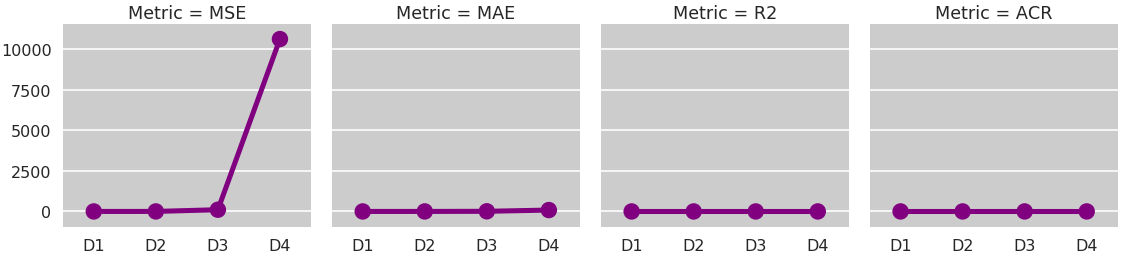

In [373]:
data = [['MSE',D1_MSE, D2_MSE, D3_MSE, D4_MSE],['MAE',D1_MAE, D2_MAE, D3_MAE, D4_MAE],
        ['R2',D1_R2, D2_R2, D3_R2, D4_R2], ['ACR', D1_Accuracy, D2_Accuracy, D3_Accuracy, D4_Accuracy]]
df = pd.DataFrame(data,columns=['Metric','D1', 'D2', 'D3', 'D4'])
print (np.round(df,3))
with sns.axes_style("darkgrid", {"axes.facecolor": "0.8"}):
    sns.set_context("poster")
    sns.factorplot(data=np.round(df, 3), kind="point", col="Metric", color='purple')
    

  Metric     D1     D2       D3         D4
0    MSE  0.011  1.062  106.240  10623.969
1    MAE  0.085  0.854    8.538     85.377
2     R2  0.157  0.157    0.157      0.157
3    ACR  0.705  0.705    0.705      0.705


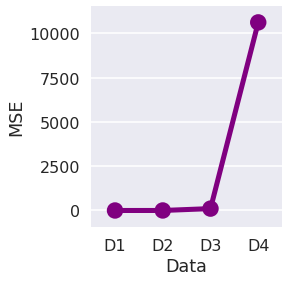

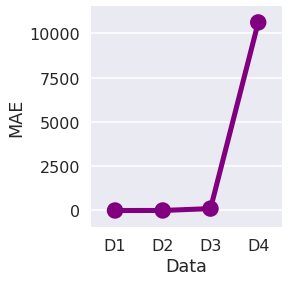

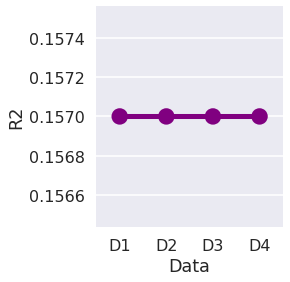

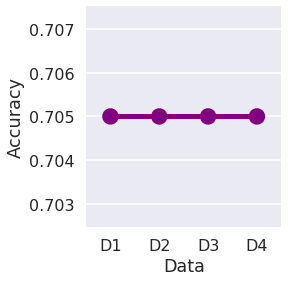

In [374]:
data = [['MSE',D1_MSE, D2_MSE, D3_MSE, D4_MSE],['MAE',D1_MAE, D2_MAE, D3_MAE, D4_MAE],
        ['R2',D1_R2, D2_R2, D3_R2, D4_R2], ['ACR', D1_Accuracy, D2_Accuracy, D3_Accuracy, D4_Accuracy]]
df = pd.DataFrame(data,columns=['Metric','D1', 'D2', 'D3', 'D4'])
print (np.round(df,3))
with sns.axes_style("darkgrid"):
    sns.set_context("poster")
    MSE=sns.factorplot(data=np.round(df.iloc[0:1, 1:5], 3), kind="point", color='purple')
    MSE.set_axis_labels("Data", "MSE")
    MAE=sns.factorplot(data=np.round(df.iloc[0:1, 1:5], 3), kind="point", color='purple')
    MAE.set_axis_labels("Data", "MAE")
    R2=sns.factorplot(data=np.round(df.iloc[2:3, 1:5], 3), kind="point", color='purple')
    R2.set_axis_labels("Data", "R2")
    ACR=sns.factorplot(data=np.round(df.iloc[3:4, 1:5], 3), kind="point", color='purple')
    ACR.set_axis_labels("Data", "Accuracy")

It can be seen from figure while MSE and MAE are increasing $R^2$ and Accuracy are constant